This document shows how to read TanSat daily files and convert them into SHP format.

In [1]:
import netCDF4 as nc
import pandas as pd
import geopandas as gpd
#from shapely.geometry import Point

In [2]:
#读取 .nc文件
#TanSat_L2_XCO2_IAPCAS_V2 (Daily data)
file_path = r'M:\WT\Tansat\TanSat_L2_XCO2_IAPCAS_V2\daily\TanSat_ACGS_SCI_ND_L2_XCO2_lite_20170301.nc'
dataset = nc.Dataset(file_path)

In [3]:
#获得变量列
variables = dataset.variables
variables

{'sounding_id': <class 'netCDF4._netCDF4.Variable'>
 int64 sounding_id(nobs)
 unlimited dimensions: 
 current shape = (3099,)
 filling on, default _FillValue of -9223372036854775806 used,
 'footprint_id': <class 'netCDF4._netCDF4.Variable'>
 float32 footprint_id(nobs)
 unlimited dimensions: 
 current shape = (3099,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(nobs)
 unlimited dimensions: 
 current shape = (3099,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(nobs)
 unlimited dimensions: 
 current shape = (3099,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'xco2_uncorrected': <class 'netCDF4._netCDF4.Variable'>
 float64 xco2_uncorrected(nobs)
 unlimited dimensions: 
 current shape = (3099,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'xco2': <class 'netCDF4._netCDF4.Variable'>
 

In [4]:
df_xco2=pd.DataFrame()
df_xco2['xco2']=dataset.variables['xco2'][:]
df_xco2['longitude']=dataset.variables['longitude'][:]
df_xco2['latitude']=dataset.variables['latitude'][:]
df_xco2['datetime']=dataset.variables['sounding_id'][:]

In [5]:
df_xco2

xco2   longitude   latitude           datetime
0     0.000402  149.609955 -37.404785  20170301040358001
1     0.000401  149.557632 -37.228020  20170301040400901
2     0.000402  149.537338 -37.228596  20170301040400902
3     0.000402  149.536743 -37.157795  20170301040402101
4     0.000402  149.394943 -37.161842  20170301040402108
...        ...         ...        ...                ...
3094  0.000406 -117.370575  43.213154  20170301205533202
3095  0.000406 -117.356194  43.202503  20170301205533504
3096  0.000406 -117.447243  43.419857  20170301205536401
3097  0.000407 -117.409355  43.405598  20170301205537607
3098  0.000406 -117.553185  43.759750  20170301205542603

[3099 rows x 4 columns]

In [6]:
# 创建GeoDataFrame,导出shp数据
gdf = gpd.GeoDataFrame(
    df_xco2, 
    geometry=gpd.points_from_xy(df_xco2.longitude, df_xco2.latitude)
)
# 设置坐标参考系统为WGS 84
gdf.set_crs(epsg=4326, inplace=True)

# 保存为Shapefile
gdf.to_file("TanSat_ACGS_SCI_ND_L2_XCO2_lite_20170301.shp")

load shp in QGIS

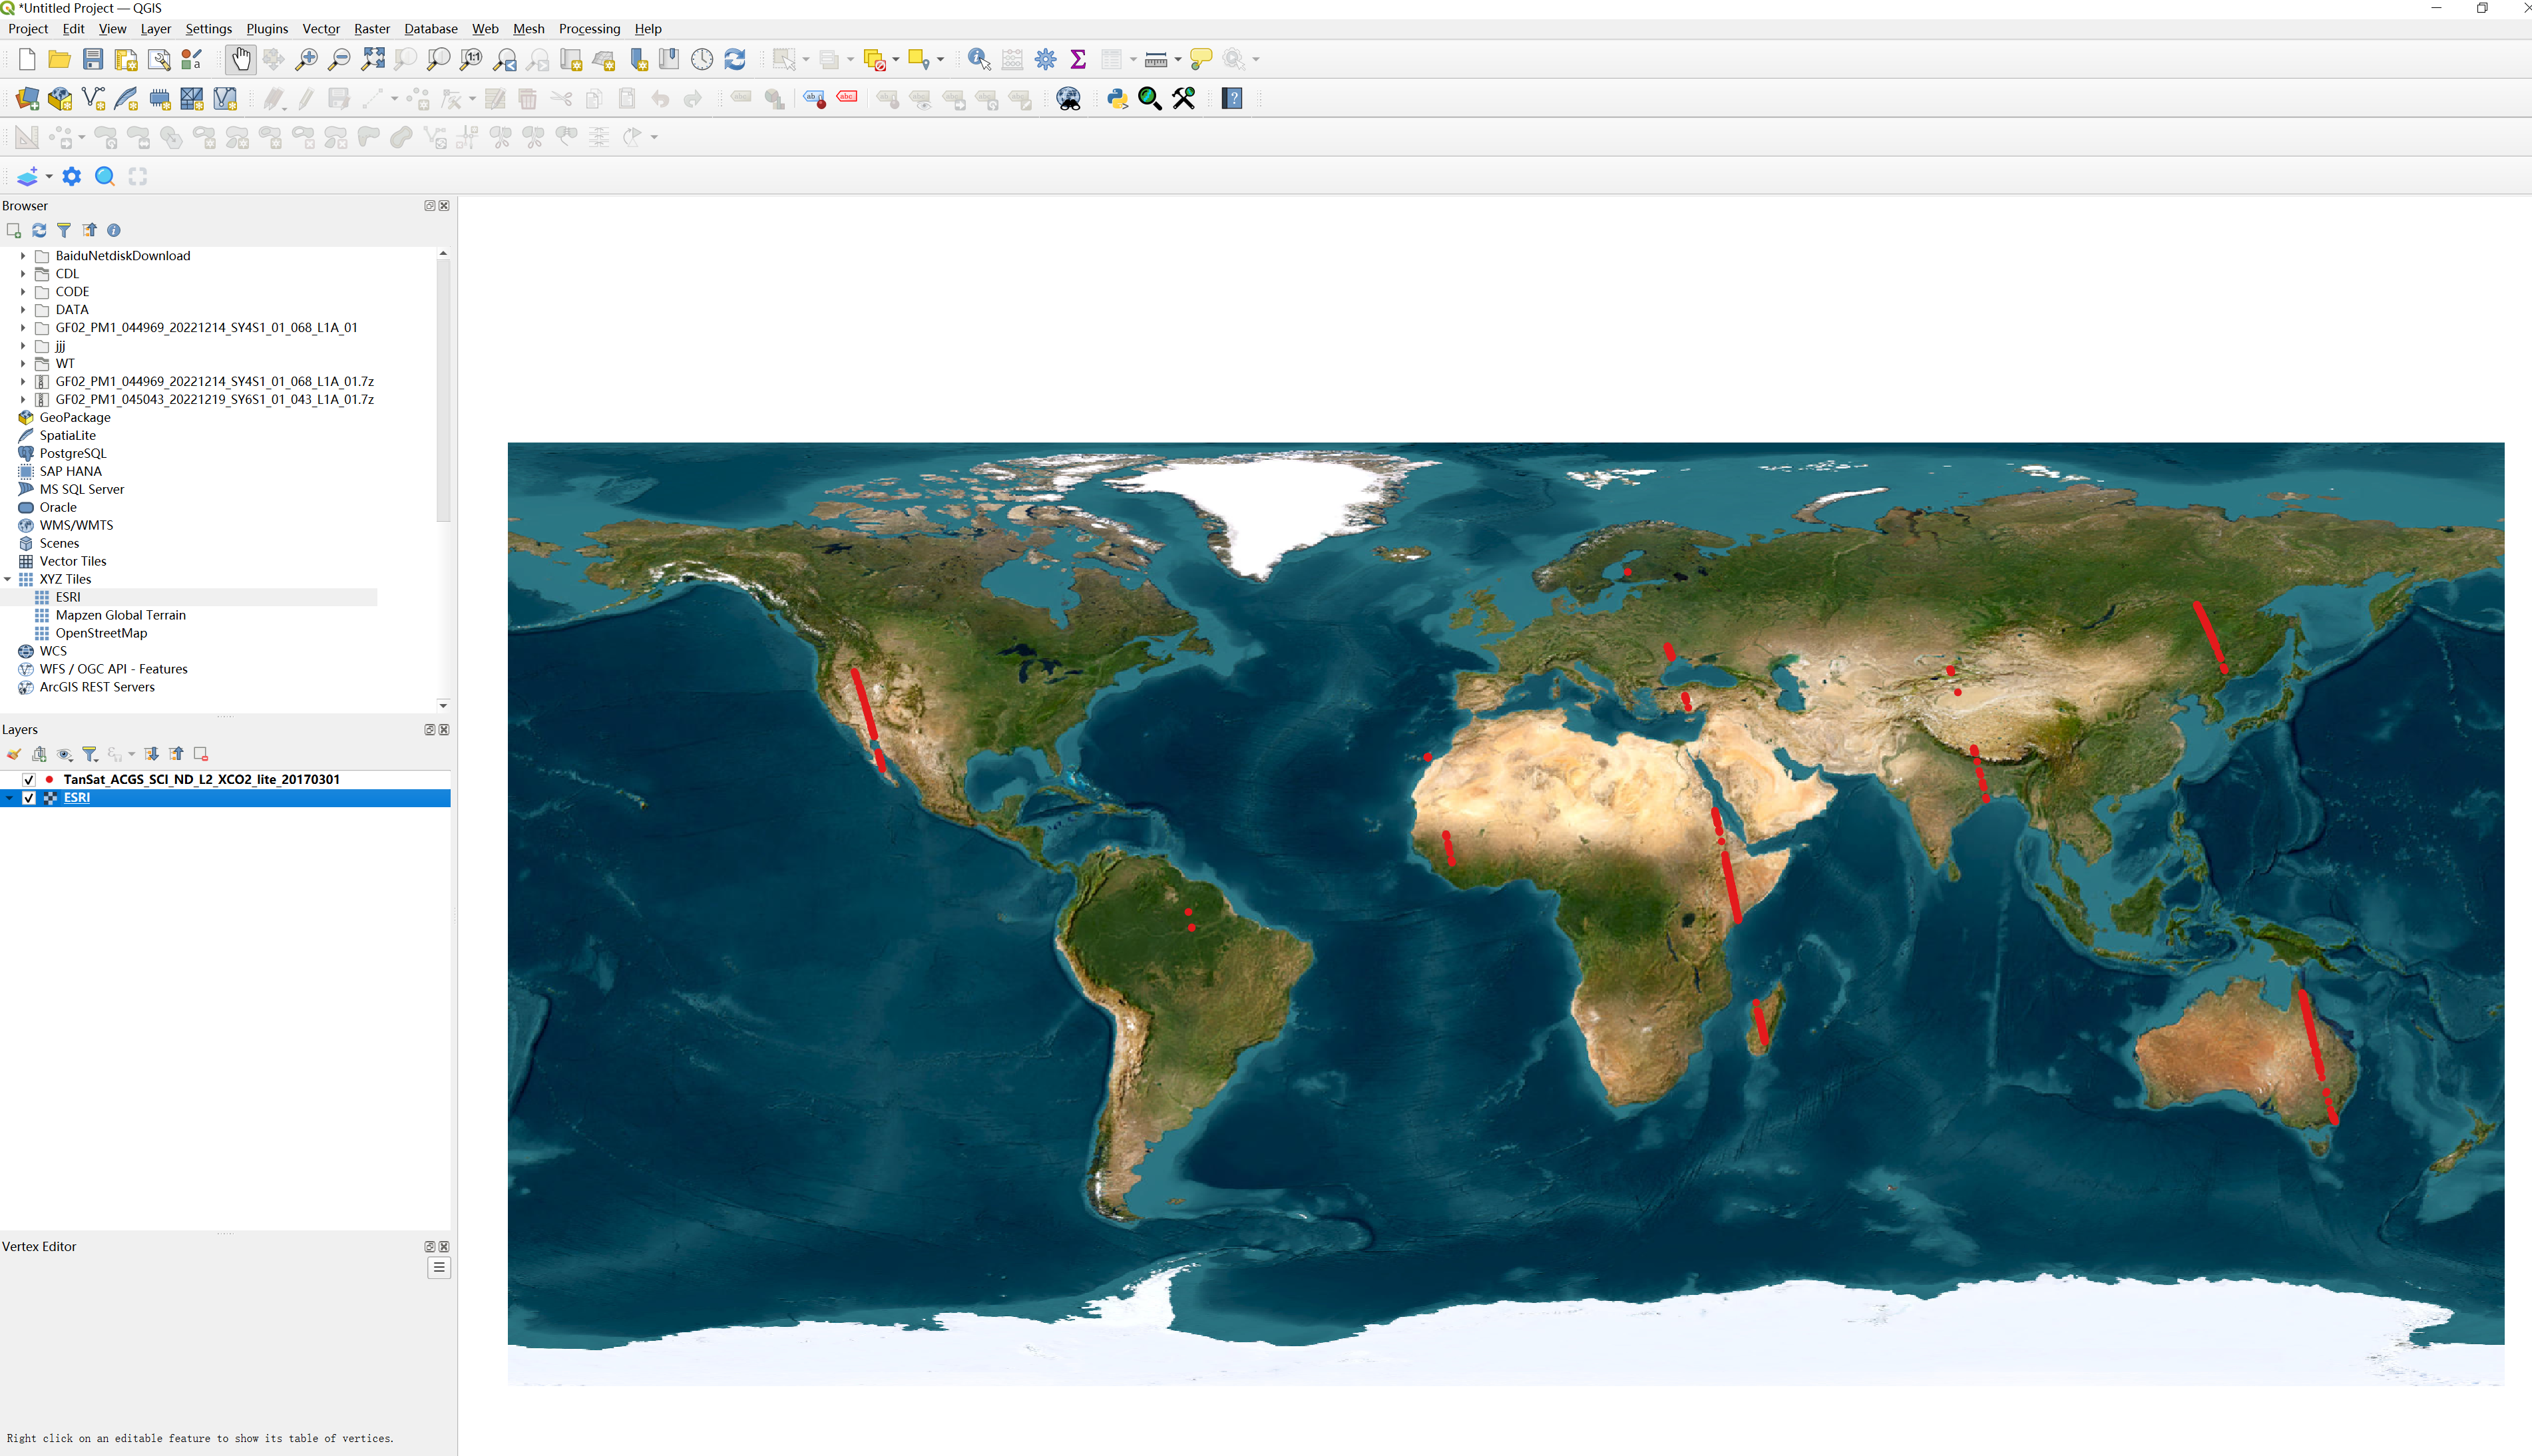